# [Genieclust](https://github.com/gagolews/genieclust) Tutorial
## The Genie Algorithm with Noise Points Detection

a.k.a. HDBSCAN* with the Genie correction

> **This tutorial is under construction. Stay tuned :)**

Author: [Marek Gagolewski](http://www.gagolewski.com)

In [1]:
# @TODO@: load a benchmark set
# @TODO@: compute with fit_predict(X), g=0.3,0.5,1.0
# @TODO@: plot with plot_scatter()
# @TODO@: report the Gini index of cluster labels
# @TODO@: compare with the reference partition



In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import genieclust

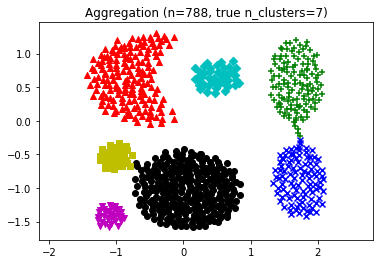

In [3]:
path = "benchmark_data"
dataset = "Aggregation"

# Load an example 2D dataset
X = np.loadtxt("%s/%s.data.gz" % (path,dataset), ndmin=2)

# Load the corresponding reference labels.
# The original labels are in {1,2,..,k} and 0 denotes the noise cluster.
# Let's make them more Python-ish by subtracting 1 (and hence the noise cluster will be marked as -1).
labels_true = np.loadtxt("%s/%s.labels0.gz" % (path,dataset), dtype=np.intc)-1
n_clusters = len(np.unique(labels_true))-(np.min(labels_true)==-1) # do not count the "noise" cluster (if present) as a separate entity

# Center and scale (proportionally in all the axes) all the points.
# Note: this is NOT a standardization of all the variables.
X = (X-np.mean(X))/np.std(X, ddof=1)

# Plot the dataset
genieclust.plots.plot_scatter(X, labels_true)
plt.title("%s (n=%d, true n_clusters=%d)"%(dataset, X.shape[0], n_clusters))
plt.axis("equal")
plt.show()

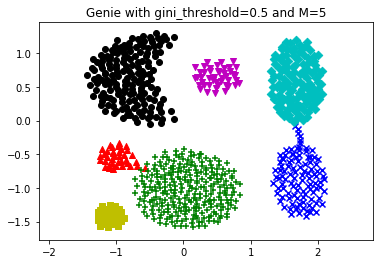

Genie(n_clusters=7, gini_threshold=0.5, M=5, postprocess='all', metric='euclidean')


In [4]:
g = genieclust.genie.Genie(n_clusters=n_clusters, gini_threshold=0.5, M=5, postprocess="all")
labels_genie = g.fit_predict(X)
genieclust.plots.plot_scatter(X, labels_genie)
plt.title("Genie with gini_threshold=%g and M=%d"%(g.gini_threshold, g.M))
plt.axis("equal")
plt.show()
print(g)

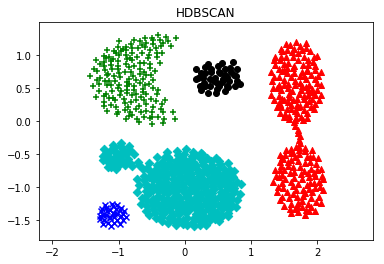

In [5]:
import hdbscan
h = hdbscan.HDBSCAN()
labels_hdbscan = h.fit_predict(X)
genieclust.plots.plot_scatter(X, labels_hdbscan)
plt.title("HDBSCAN")
plt.axis("equal")
plt.show()

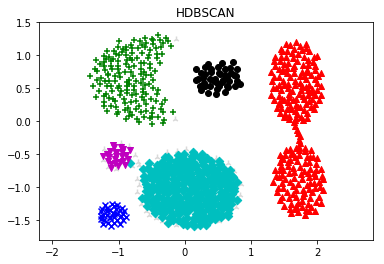

In [6]:
import hdbscan
h = hdbscan.HDBSCAN(min_cluster_size=15)
labels_hdbscan = h.fit_predict(X)
genieclust.plots.plot_scatter(X, labels_hdbscan)
plt.title("HDBSCAN")
plt.axis("equal")
plt.show()